# Linear regression with tensorflow



## 1. Create Datset

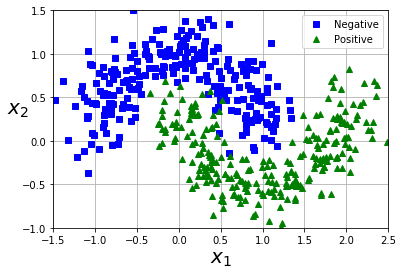

In [21]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Negative")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^",label="Positive")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.legend()
   
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## 2. Prepare data

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test=  train_test_split(X,y,random_state=42, test_size=0.33)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
y_train_scaled=scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled=scaler.transform(y_test.reshape(-1,1))

# add bias term since we want to use a linear model with intercerpt
X_train_scaled_with_bias=np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled] 
X_test_scaled_with_bias=np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled] 


/home/lweichbrodt/.conda/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lweichbrodt/.conda/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lweichbrodt/.conda/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


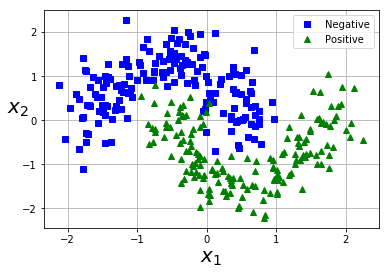

In [22]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y<0], X[:, 1][y<0], "bs",label="Negative")
    plt.plot(X[:, 0][y>0], X[:, 1][y>0], "g^",label="Positive")
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.legend()


plot_dataset(X_train_scaled, y_train_scaled.squeeze())

## 3. Model

## 3.1 Simple version 




In [14]:
import tensorflow as tf

class LinearRegression(object):
    
    def __init__(self, input_tensor, target_tensor):
        
        # input and output
        self.input=input_tensor
        self.target=target_tensor
    
        # model
        self.weights=tf.Variable(tf.random.truncated_normal(shape=(int(input_tensor.shape[1]),1)),name="weights") 
        self.prediction=tf.matmul(self.input,self.weights, name="prediction")

        # loss function to optimize
        self.error=tf.reduce_mean(tf.square(self.prediction-self.target))

        # define learning
        self.training_operation= tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(self.error)

    def train(self,feed_dict):
        session=tf.get_default_session()
        session.run(self.training_operation, feed_dict)
    
    def get_error(self,feed_dict):
        session=tf.get_default_session()
        return session.run(self.error, feed_dict)
    
    def get_weights(self):
        session=tf.get_default_session()
        return session.run(self.weights)
    
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)



In [15]:
# training
reset_graph()

# define model
X=X_train_scaled_with_bias
y=y_train_scaled
num_features=X.shape[1]
input=tf.placeholder(tf.float32, shape=(None,num_features),name="input")
target=tf.placeholder(tf.float32, shape=(None,1),name="target")
model= LinearRegression(input, target)

num_epoches=1000
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for e in range(num_epoches):
        model.train(feed_dict={input:X,target:y})
        
    print("Error: %s" % model.get_error(feed_dict={input:X,target:y}))
    print("Weights:\n%s " % model.get_weights())


Error: 0.38736176
Weights:
[[-1.5743229e-08]
 [ 3.0824563e-01]
 [-6.0883832e-01]] 


Comment: Learning rate and num_epoches are not tuned, I stopped after finding a fast config that gives the same result as the optimal solution

Error: 0.38736179111438557
Weights: 
[[ 1.45716772e-16]
 [ 3.08249768e-01]
 [-6.08833948e-01]]
Error: 0.09683268155868097
Precision: 0.8554216867469879
[1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.

ValueError: all the input arrays must have same number of dimensions

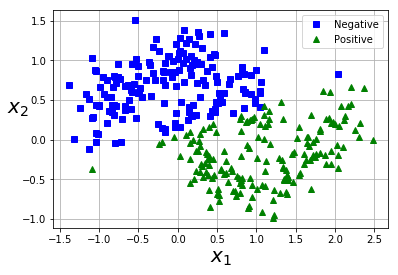

In [45]:
# optimal solution via linear algebra
X = X_train_scaled_with_bias
y = y_train_scaled
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

pred=X.dot(theta_numpy)
mse=1/len(y)*np.sum((pred.reshape(1,-1)-y.reshape(1,-1))**2)
print("Error: %s" % mse)
print("Weights: \n%s" % theta_numpy)

# alternative: compare to sklearn (same logic but convient to use, 
# sklearn calls scipi orginary least quare scipy.linalg.lstsq under the hood

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,precision_score
lin_reg = LinearRegression(fit_intercept=True, normalize=True)
lin_reg.fit(X_train, y_train)
print("Error: %s" % mean_squared_error(lin_reg.predict(X_train),y_train))
print("Precision: %s" % precision_score(lin_reg.predict(X_train)>0.5,y_train))




def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Negative")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^",label="Positive")
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.legend()

pred=lin_reg.predict(X_train)
pred[pred>0.5]=1
pred[pred<0.5]=0#
print(pred)
plot_dataset(X_train, pred)
#plot_dataset(X_train, y_train)


print("Weights: \n%s" % np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

In [37]:
pred

array([1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0.

## 3.2 Enhanced version

In [ ]:
# 1. make the graph reusable

def linear_regression(input_tensor, target_tensor, scope):
    with tf.variable_scope(scope):
         
        # model
        weights=tf.Variable(tf.random.truncated_normal(shape=(int(input_tensor.shape[1]),1)),name="weights") 
        prediction=tf.matmul(self.input,self.weights, name="prediction")

        # loss function to optimize
        self.error=tf.reduce_mean(tf.square(self.prediction-self.target))

        # define learning
        self.training_operation= tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(self.error)
        